In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load the dataset
df = pd.read_csv('udemy_courses_with_student_performance.csv')

In [42]:
# Preprocess data
df['Student_Interest'] = df['Student_Interest'].astype('category').cat.codes
features = ['Student_Interest', 'Course_Rating', 'Student_Performance']



In [43]:
# Normalize features for content-based filtering
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(df[features])


In [44]:
# ============================
# 1. Content-Based Filtering
# ============================
# Build a k-NN model for course similarity
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(normalized_features)

def recommend_courses_content_based(course_features, top_n=5):
    distances, indices = knn.kneighbors([course_features])
    return df.iloc[indices[0]]['course_title'].values[:top_n]

# ============================
# 2. Collaborative Filtering (SVD)
# ============================
# Create a student-course interaction matrix
student_course_matrix = df.pivot(index='Student_ID', columns='course_title', values='Student_Performance').fillna(0)
sparse_matrix = csr_matrix(student_course_matrix.values)

# Apply SVD
svd = TruncatedSVD(n_components=10, random_state=42)
latent_matrix = svd.fit_transform(sparse_matrix)



In [45]:

# Recommend courses for collaborative filtering
def recommend_courses_collaborative(student_id, top_n=5):
    student_idx = student_course_matrix.index.get_loc(student_id)
    student_latent = latent_matrix[student_idx]
    similarities = np.dot(latent_matrix, student_latent)
    recommended_idx = np.argsort(-similarities)[1:top_n+1]  # Exclude self
    return student_course_matrix.columns[recommended_idx]



In [46]:
# ============================
# 3. Hybrid Recommendation
# ============================
def hybrid_recommendation(student_id, course_features, top_n=5):
    # Content-based recommendations
    content_based = recommend_courses_content_based(course_features, top_n=top_n)
    
    # Collaborative filtering recommendations
    collaborative = recommend_courses_collaborative(student_id, top_n=top_n)
    
    # Combine recommendations: Intersection or weighted union
    final_recommendations = list(set(content_based).intersection(set(collaborative)))
    if len(final_recommendations) < top_n:
        # Fill up with union if intersection is small
        union = list(set(content_based).union(set(collaborative)))
        final_recommendations.extend(union[:top_n - len(final_recommendations)])
    
    return final_recommendations[:top_n]



In [50]:
# Example usage
example_student_id = 'Student_4'
example_course_features = [1, 4.5, 85.0]  # Example: Interest=1, Rating=4.5, Performance=85

print("Hybrid Recommendations:", hybrid_recommendation(example_student_id, example_course_features))

Hybrid Recommendations: ['HTML5 CSS3 JQUERY Single Page Website Project from Scratch', 'WordPress Plugins Treasure Chest', '3D Programming with WebGL and Babylon.js for Beginners', '88 Logic - The Essential Guide To Learning Piano', 'Sketch 3 from A to Z: Become an App Designer']


In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have true labels (e.g., whether the student actually liked the course)
y_true = [1, 0, 1, 1]  # Example: Actual preferences
y_pred = [1, 0, 1, 0]  # Example: Predicted preferences

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 1.0
Recall: 0.6666666666666666
F1 Score: 0.8


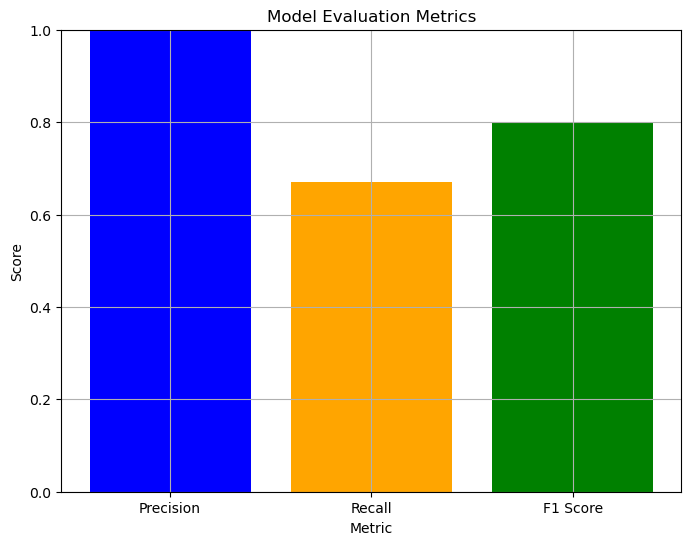

In [53]:
import numpy as np

# Example values (replace with your own)
precision_val = 1.0
recall_val = 0.67
f1_score_val = 0.8

metrics = ['Precision', 'Recall', 'F1 Score']
values = [precision_val, recall_val, f1_score_val]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green'])
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.grid(True)
plt.show()
